In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dataset.csv")

df['Date_ordinal'] = df['Date'].map(pd.to_datetime).map(pd.Timestamp.toordinal)

In [3]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   level_0       1258 non-null   int64  
 1   index         1258 non-null   int64  
 2   Date          1258 non-null   object 
 3   Open          1258 non-null   float64
 4   High          1258 non-null   float64
 5   Low           1258 non-null   float64
 6   Close         1258 non-null   float64
 7   Volume        1258 non-null   int64  
 8   Dividends     1258 non-null   float64
 9   Stock Splits  1258 non-null   float64
 10  Date_ordinal  1258 non-null   int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 108.2+ KB
None
level_0         0
index           0
Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Date_ordinal    0
dtype: int64


In [4]:
X = df[['Date_ordinal']].values
y = df['Close'].values

In [5]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X, y)

y_pred = model.predict(X)

In [6]:
from sklearn.metrics import mean_squared_error, r2_score

rmse_score = np.sqrt(mean_squared_error(y, y_pred))
r2_score = r2_score(y, y_pred)

print("Root Mean Squared Error (RMSE): ", rmse_score)
print("R² Score: ", r2_score)

Root Mean Squared Error (RMSE):  6.735407608266315
R² Score:  0.9996515257198528


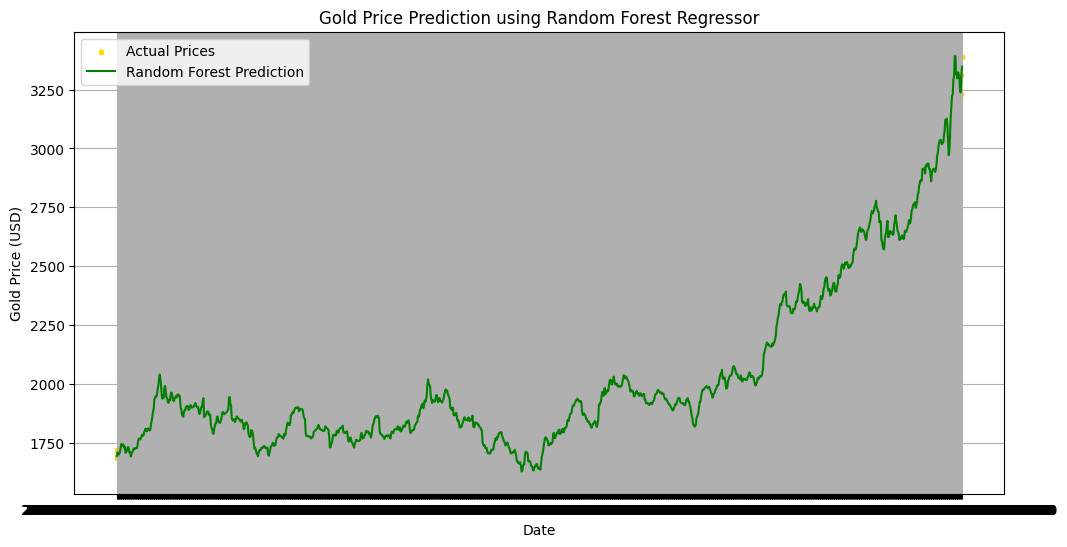

In [7]:
plt.figure(figsize=(12, 6))
plt.scatter(df['Date'], y, label='Actual Prices', color='gold', s=10)
plt.plot(df['Date'], y_pred, label='Random Forest Prediction', color='green')
plt.xlabel('Date')
plt.ylabel('Gold Price (USD)')
plt.title('Gold Price Prediction using Random Forest Regressor')
plt.legend()
plt.grid(True)
plt.show()